# Flight Booking Price Prediction

## Objective

The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight 
tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous 
value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful 
information from it. 

## Dataset Information

Flight booking price prediction dataset contains around 3 lacs records with 11 attributes 


In [1]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

df=pd.read_csv("Flight_Booking.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
# Remove unnecessary column from dataframe

df=df.drop(columns="Unnamed: 0")

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
# Check datatypes of all columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
# Calculate statistical data

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
# Check out missing values.

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### Data Visualization

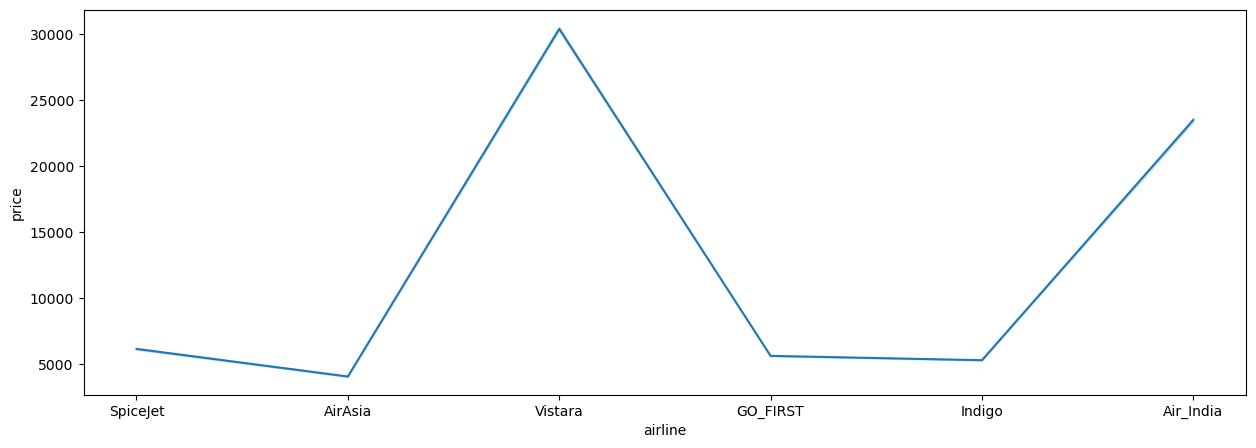

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(x="airline", y="price", data=df)
plt.show()

#### There is variation in price with different airlines.



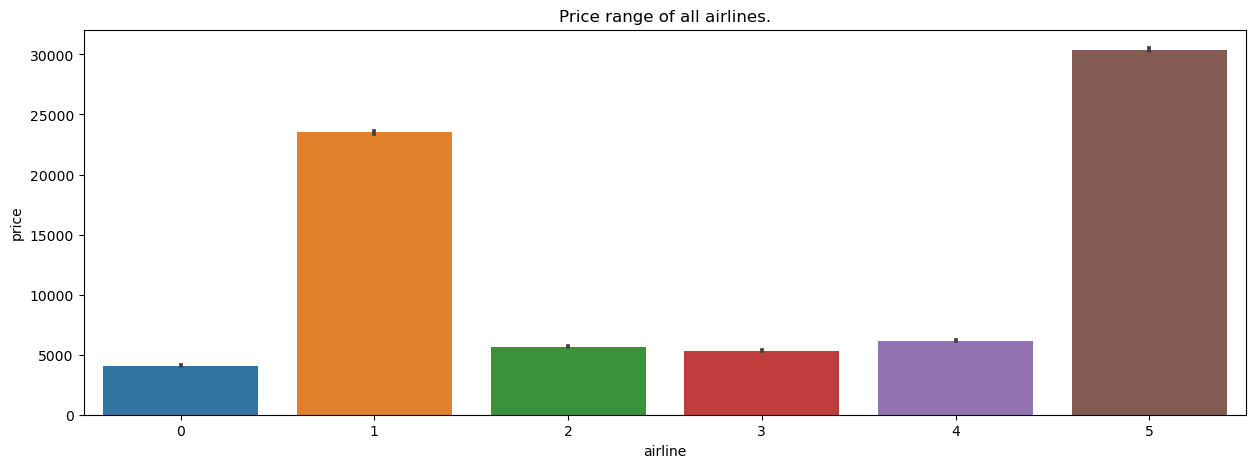

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x="airline", y="price", data=df)
plt.title("Price range of all airlines.")
plt.show()

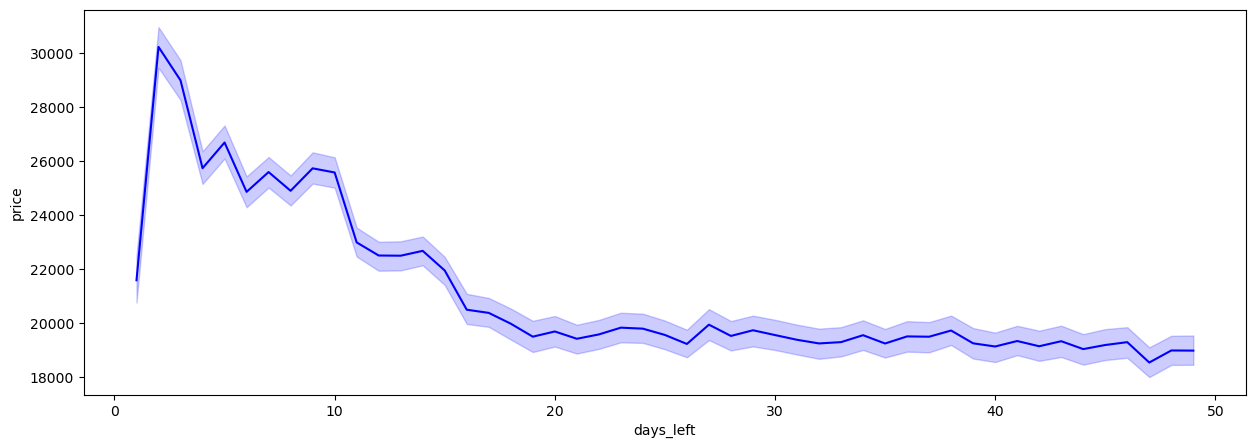

In [69]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df["days_left"], y=df["price"],color='blue')
plt.show()

#### The price of the ticket increases as the days left for departure decreases.


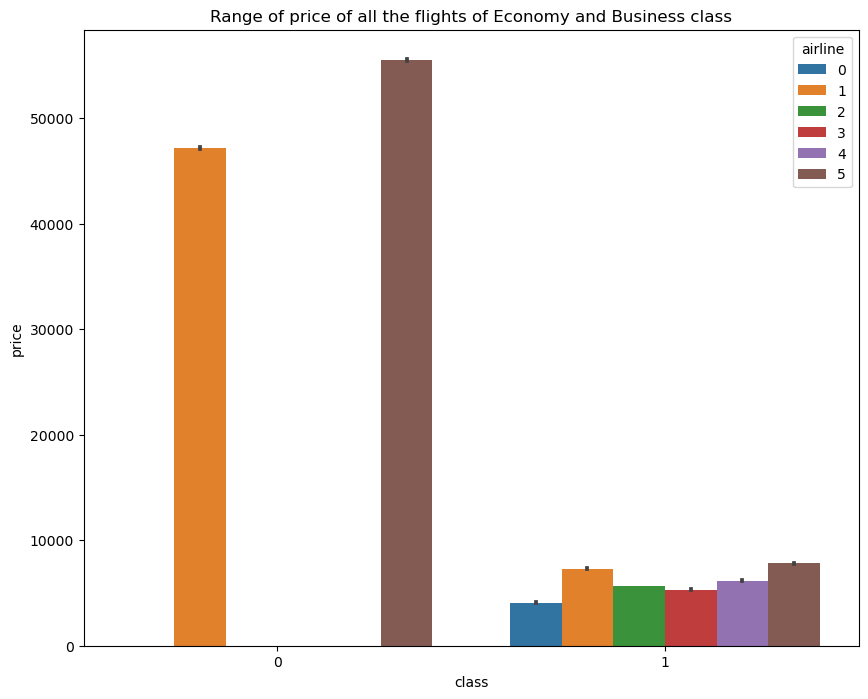

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(x="class", y="price", hue='airline', data=df)
plt.title("Range of price of all the flights of Economy and Business class")
plt.show()

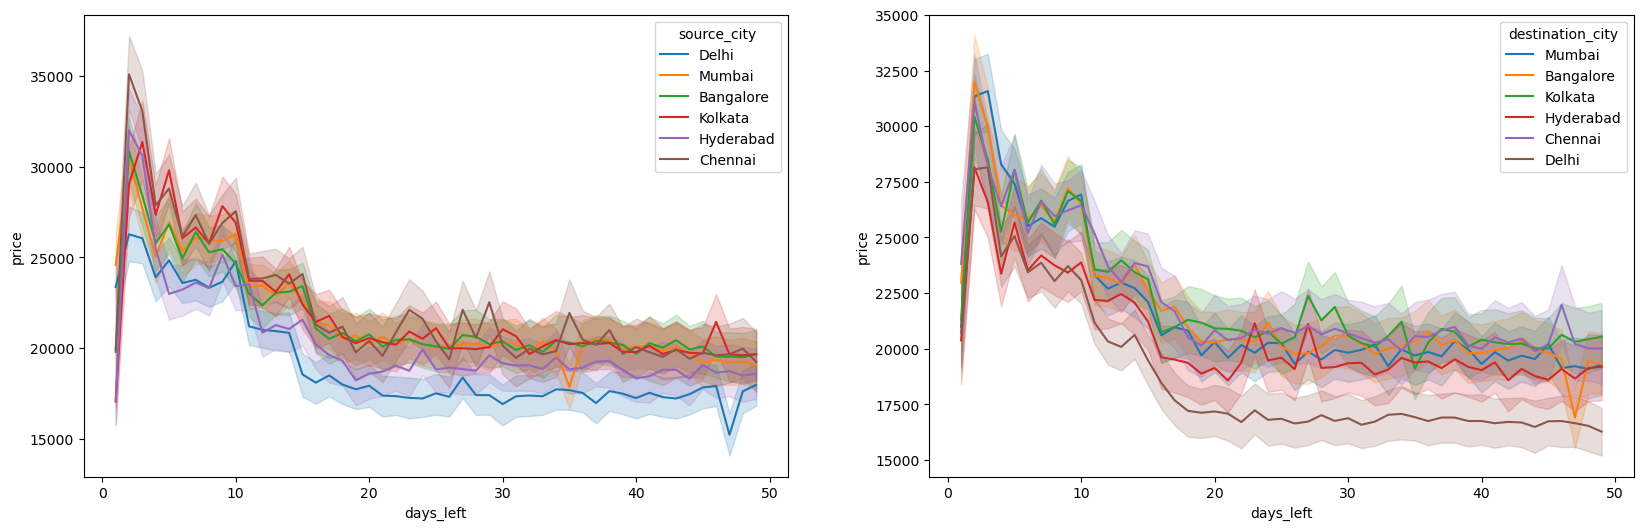

In [14]:
# Range of price of flights with source  and destination city according to the days left

fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x="days_left", y="price",hue='source_city',data=df, ax=ax[0])
sns.lineplot(x="days_left", y="price",hue='destination_city',data=df, ax=ax[1])
plt.show()

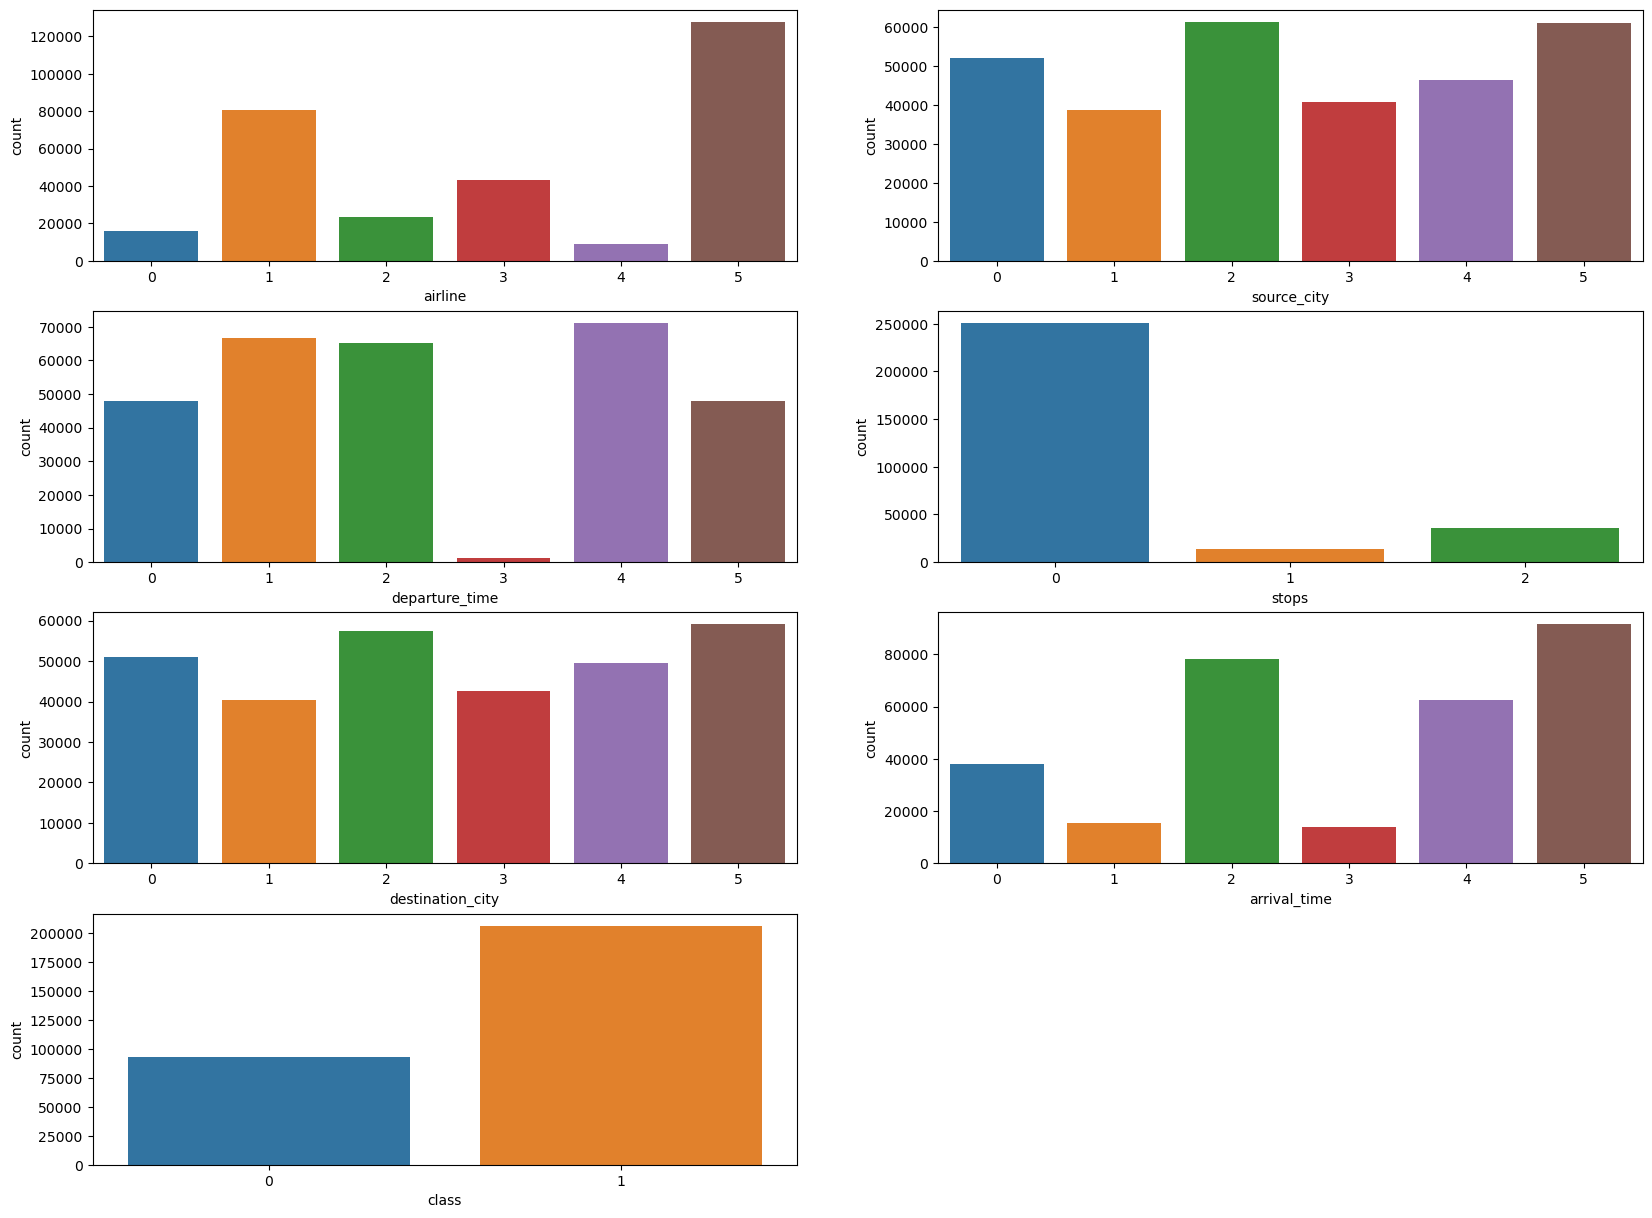

In [72]:
# Visualization of categorical features with countplot


plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.countplot(x='airline', data=df)

plt.subplot(4,2,2)
sns.countplot(x='source_city', data=df)

plt.subplot(4,2,3)
sns.countplot(x='departure_time', data=df)

plt.subplot(4,2,4)
sns.countplot(x='stops', data=df)

plt.subplot(4,2,5)
sns.countplot(x='destination_city', data=df)

plt.subplot(4,2,6)
sns.countplot(x='arrival_time', data=df)

plt.subplot(4,2,7)
sns.countplot(x='class', data=df)

plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [17]:
#Label Encoding for categorical features.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [18]:
col_list=df.columns

In [19]:
col_list

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [20]:
for col in col_list:
    if (df[col].dtypes=='object') & (col!="price"):
        df[col]=le.fit_transform(df[col])
        

In [21]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


<AxesSubplot:>

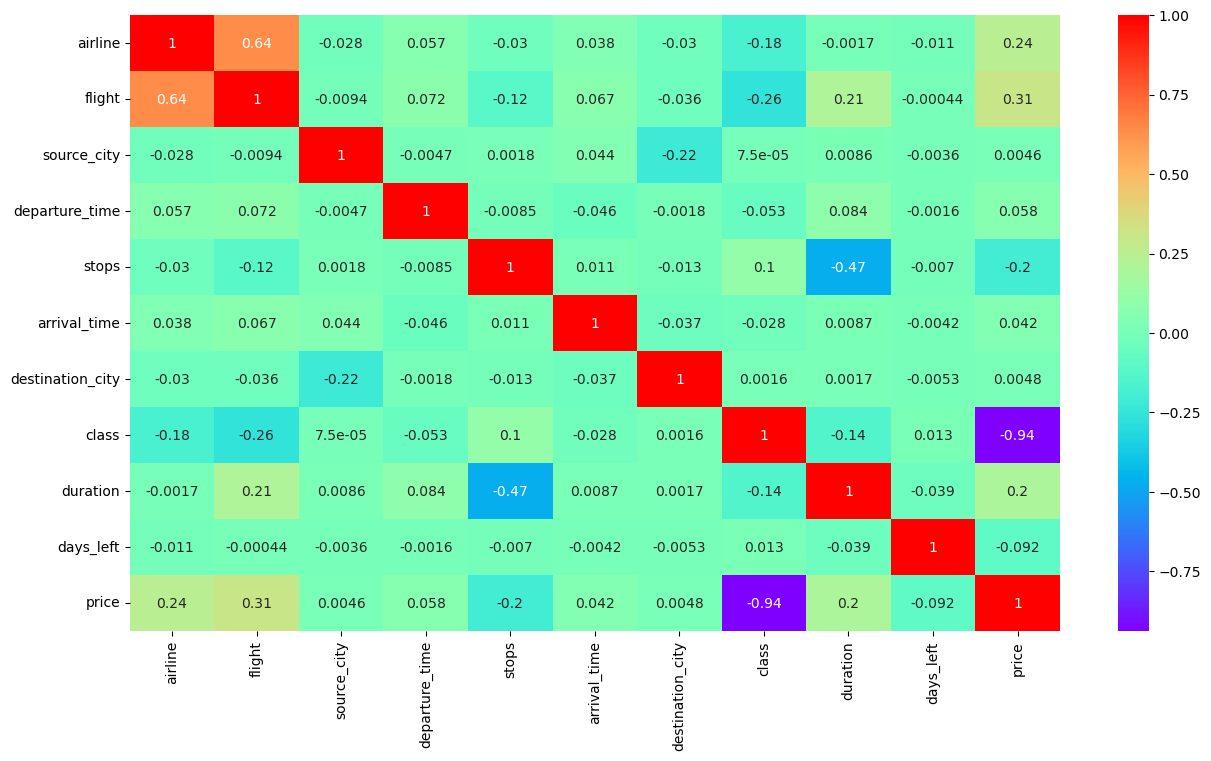

In [23]:
# Feature Selection
# Plotting the correlation graph to see the correlation between features and dependent variable.

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),data=df,annot=True,cmap='rainbow')

In [24]:
column_list=[]
for col in df.columns:
    if (df[col].dtypes!='object') & (col!="price"):
        column_list.append(col)

In [25]:
column_list

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [26]:
# Feature Selection
# Selecting the features using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df[column_list]

vif_data=pd.DataFrame()
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

           Features        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [27]:
X=X.drop(columns='flight')

In [28]:
vif_data=pd.DataFrame()
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

           Features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [29]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1


In [30]:
X # independent features
Y=df["price"] #dependent variable

In [31]:
Y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [ ]:
# Standardization by StandardScalar

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Linear Regression
### Implementing Linear Regression Model to  predict the price of a flight.


In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
pred=lr.predict(x_test)

In [36]:
pred

array([ 4585.88050973, 52842.07707275,  7877.98018389, ...,
        5848.96550018, -1498.06191818, 58762.40634474])

In [37]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE.(Lower the RMSE and MAPE better the model)

In [38]:
from sklearn.metrics import *

r2_score(y_test,pred)

0.904554350718816

In [39]:
mse=mean_squared_error(y_test,pred)

In [40]:
mse

49200540.293722

In [41]:
rmse=np.sqrt(mse)
print(rmse)

7014.309680483319


In [42]:
mean_absolute_error(y_test,pred)

4624.9948680168745

In [43]:
mean_absolute_percentage_error(y_test,pred)

0.4353581089683267

In [44]:
diff=pd.DataFrame(np.c_[y_test,pred],columns=["Actual_Value","Predicted_Value"])


In [45]:
diff

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


C:\Users\Rupali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rupali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


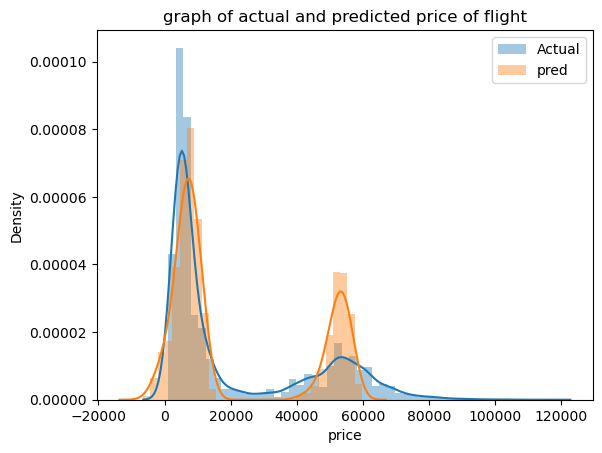

In [74]:
sns.distplot(y_test,label="Actual")
sns.distplot(pred,label="pred")
plt.legend()
plt.title("Graph of actual and predicted price of flight")
plt.show()

### Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
pred1=dr.predict(x_test)

In [49]:
pred1

array([ 7366., 72783.,  6195., ...,  6314.,  5082., 70049.])

In [50]:
r2_score(y_test,pred1)

0.9757124490208523

In [51]:
mse=mean_squared_error(y_test,pred1)
print(mse)

12519801.998150956


In [52]:
rmse=np.sqrt(mse)
print(rmse)

3538.3332231646805


In [53]:
mean_absolute_error(y_test,pred1)

1172.0967000383134

In [54]:
mean_absolute_percentage_error(y_test,pred1)

0.07344146872191079

#### Mean absolute percentage error is 7.7 percent and RMSE is 3620 which is less than the linear regression model.


### Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [56]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
pred2=rfr.predict(x_test)

In [58]:
r2_score(y_test,pred2)

0.9849633728280327

In [59]:
mse=mean_squared_error(y_test,pred2)
print(mse)

7751114.761413213


In [60]:
rmse=np.sqrt(mse)
print(rmse)

2784.082391276022


In [61]:
mean_absolute_error(y_test,pred2)

1090.0580500781186

In [62]:
mean_absolute_percentage_error(y_test,pred2)

0.07033004412781942

C:\Users\Rupali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rupali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


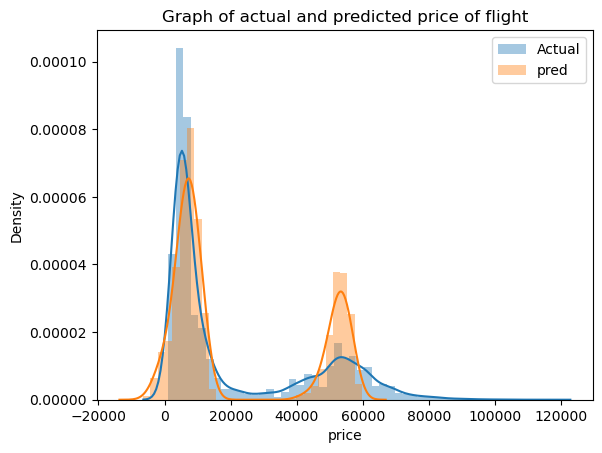

In [75]:
sns.distplot(y_test,label="Actual")
sns.distplot(pred,label="pred")
plt.legend()
plt.title("Graph of actual and predicted price of flight")
plt.show()

#### Mean absolute percentage error is 7.3 percent and RMSE is 2824 which is less than the linear regression and decision tree mode